<a href="https://colab.research.google.com/github/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/blob/master/PRUEBAS_PREDICCI%C3%93N_Proyecto_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAR LIBRERÍAS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import os.path
from pathlib import Path
import shutil 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import torch
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from typing import List
from shutil import rmtree

In [47]:
#Clonar carpeta Github
! git clone 'https://github.com/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo.git'

Cloning into 'DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo'...
remote: Enumerating objects: 10694, done.
remote: Counting objects: 100% (10694/10694), done.
remote: Compressing objects: 100% (1095/1095), done.
remote: Total 10694 (delta 10190), reused 10060 (delta 9594), pack-reused 0
Receiving objects: 100% (10694/10694), 4.27 MiB | 12.67 MiB/s, done.
Resolving deltas: 100% (10190/10190), done.


In [46]:
#Eliminar carpeta Github
rmtree("DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo")

#INICIALIZACIÓN DE TENSOR VACÍO (131,5,5,14)

In [ ]:
inputs= np.empty((262, 5, 5, 19), dtype='float32')
bag= np.empty((262, 5, 5, 19), dtype='float32')

outputs = np.empty((262,1), dtype='float32')
print(inputs.shape)
print(outputs.shape)

(262, 5, 5, 19)
(262, 1)


#CARGA DE DATA Y STACKING DE IMÁGENES (14 VARIABLES)

In [ ]:
from typing import List
Dataset = r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET' # Dirección general del DATASET
List_of_possibilities = os.listdir(Dataset) # Si deslizamiento / No deslizamiento
List_of_possibilities = sorted(List_of_possibilities)
add = 0    
local = 0  

for your_possibilities_name in List_of_possibilities: # Accede a las carpetas del DATASET
  p=os.path.join(Dataset,your_possibilities_name)
  Folder = p
  List_of_folder = os.listdir(Folder)
  List_of_folder = sorted(List_of_folder)
  local = local+1
  print(Folder)

  for your_folder_name in List_of_folder: # Accede a las subcarpetas (cada deslizamiento) del DATASET
    a=os.path.join(Folder,your_folder_name)
    b=(str(a))
    Carpeta = b
    #print(Carpeta)

    add = add+1

    List_of_files = os.listdir(Carpeta)
    List_of_files = sorted(List_of_files)

    sum=0
    for i in [1]:  # Para que las matrices sean definadas antes de ser apiladas
      for your_file_name in List_of_files: #Para acceder a cada imagen del DATASET
        c=os.path.join(Carpeta,your_file_name)
        d=(str(c))

        Archivo = d
        print(Archivo)

        sum=sum+1
        #print(sum)
        if sum == 1:
          v1 = Image.open(Archivo)
          v1array = np.array(v1)
        elif sum == 2:
          v2 = Image.open(Archivo)
          v2array = np.array(v2)
        elif sum == 3:
          v3 = Image.open(Archivo)
          v3array = np.array(v3)
        elif sum == 4:
          v4 = Image.open(Archivo)
          v4array = np.array(v4)
        elif sum == 5:
          v5 = Image.open(Archivo)
          v5array = np.array(v5)
        elif sum == 6:
          v6 = Image.open(Archivo)
          v6array = np.array(v6)
        elif sum == 7:
          v7 = Image.open(Archivo)
          v7array = np.array(v7)
          v7array = np.clip(v7array, 0, 1)
        elif sum == 8:
          v8 = Image.open(Archivo)
          v8array = np.array(v8)
          v8array = np.clip(v8array, 0, 1)
        elif sum ==9:
          v9 = Image.open(Archivo)
          v9array = np.array(v9)
          v9array = np.clip(v9array, 0, 1)
        elif sum == 10:
          v10 = Image.open(Archivo)
          v10array = np.array(v10)
          v10array = np.clip(v10array, 0, 1)
        elif sum == 11:
          v11 = Image.open(Archivo)
          v11array = np.array(v11)
        elif sum == 12:
          v12 = Image.open(Archivo)
          v12array = np.array(v12)
        elif sum == 13:
          v13 = Image.open(Archivo)
          v13array = np.array(v13)
        elif sum == 14:
          v14 = Image.open(Archivo)
          v14array = np.array(v14)
        elif sum == 15:
          v15 = Image.open(Archivo)
          v15array = np.array(v15)
        elif sum ==16:
          v16 = Image.open(Archivo)
          v16array = np.array(v16)
        elif sum == 17:
          v17 = Image.open(Archivo)
          v17array = np.array(v17)
          v17array = np.clip(v17array, 0, 1)
        elif sum == 18:
          v18 = Image.open(Archivo)
          v18array = np.array(v18)
          v18array = np.clip(v18array, 0, 1)
        elif sum == 19:
          v19 = Image.open(Archivo)
          v19array = np.array(v19)
          v19array = np.clip(v19array, 0, 1)
          
      img = np.dstack((v1array, v2array, v3array, v4array, v5array, v6array, v7array, v8array, v9array, v10array, v11array, v12array, v13array, v14array, v15array, v16array, v17array, v18array, v19array))
     
      inputs[add-1] = img
      
  #print(inputs.shape)
  #print(inputs[130])
  
  if local==1:
    outputs[0:131]=0
  elif local==2:
    outputs[131:262]=1

print (inputs.shape)
print (outputs.shape)
print('----------------------')
print (outputs[:5])
print (outputs[131:136])



/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/Aspect_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/Channel Network Base Level_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/Channet Network Distance_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/Distance to faults_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/Distance to roads_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/Elevation_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/G1_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/G3_0.tif
/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET/NO DESLIZAMIENTO/0/G4_0.tif
/co

In [ ]:
print('Vegetación 1')
print(v17array)
print('Vegetación 2')
print(v18array)
print('Vegetación 3')
print(v19array)

Vegetación 1
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Vegetación 2
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Vegetación 3
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


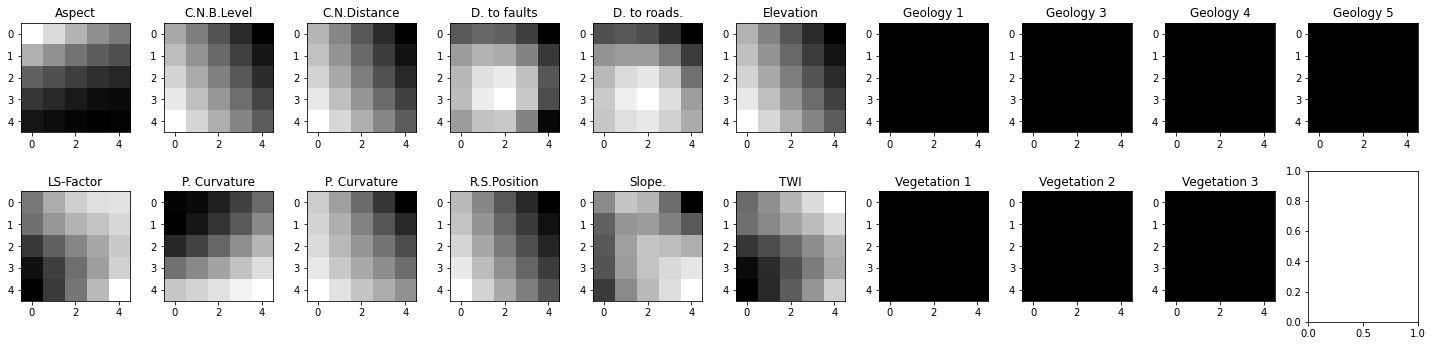

In [ ]:
fig, ax = plt.subplots(2,10,figsize=(20,5))

q=260 #Posición dentro de los inputs, Carpeta_0 No Deslizamientos
ax[0,0].imshow(inputs[q,:,:,0], cmap='gray')
ax[0,0].set_title('Aspect')
ax[0,1].imshow(inputs[q,:,:,1], cmap='gray')
ax[0,1].set_title('C.N.B.Level')
ax[0,2].imshow(inputs[q,:,:,2], cmap='gray')
ax[0,2].set_title('C.N.Distance')
ax[0,3].imshow(inputs[q,:,:,3], cmap='gray')
ax[0,3].set_title('D. to faults')
ax[0,4].imshow(inputs[q,:,:,4], cmap='gray')
ax[0,4].set_title('D. to roads.')
ax[0,5].imshow(inputs[q,:,:,5], cmap='gray')
ax[0,5].set_title('Elevation')
ax[0,6].imshow(inputs[q,:,:,6], cmap='gray')
ax[0,6].set_title('Geology 1')
ax[0,7].imshow(inputs[q,:,:,7], cmap='gray')
ax[0,7].set_title('Geology 3')
ax[0,8].imshow(inputs[q,:,:,8], cmap='gray')
ax[0,8].set_title('Geology 4')
ax[0,9].imshow(inputs[q,:,:,9], cmap='gray')
ax[0,9].set_title('Geology 5')
ax[1,0].imshow(inputs[q,:,:,10], cmap='gray')
ax[1,0].set_title('LS-Factor')
ax[1,1].imshow(inputs[q,:,:,11], cmap='gray')
ax[1,1].set_title('P. Curvature')
ax[1,2].imshow(inputs[q,:,:,12], cmap='gray')
ax[1,2].set_title('P. Curvature')
ax[1,3].imshow(inputs[q,:,:,13], cmap='gray')
ax[1,3].set_title('R.S.Position')
ax[1,4].imshow(inputs[q,:,:,14], cmap='gray')
ax[1,4].set_title('Slope.')
ax[1,5].imshow(inputs[q,:,:,15], cmap='gray')
ax[1,5].set_title('TWI')
ax[1,6].imshow(inputs[q,:,:,16], cmap='gray')
ax[1,6].set_title('Vegetation 1')
ax[1,7].imshow(inputs[q,:,:,17], cmap='gray')
ax[1,7].set_title('Vegetation 2')
ax[1,8].imshow(inputs[q,:,:,18], cmap='gray')
ax[1,8].set_title('Vegetation 3')

fig.tight_layout()
plt.show()

#RED CONVOLUCIONAL

##DEFINICIÓN DEL MODELO

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 3, 3, 8)           1376      
                                                                 
 conv2d_28 (Conv2D)          (None, 1, 1, 16)          1168      
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 1, 32)          544       
                                                                 
 flatten_9 (Flatten)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,177
Trainable params: 4,177
Non-traina

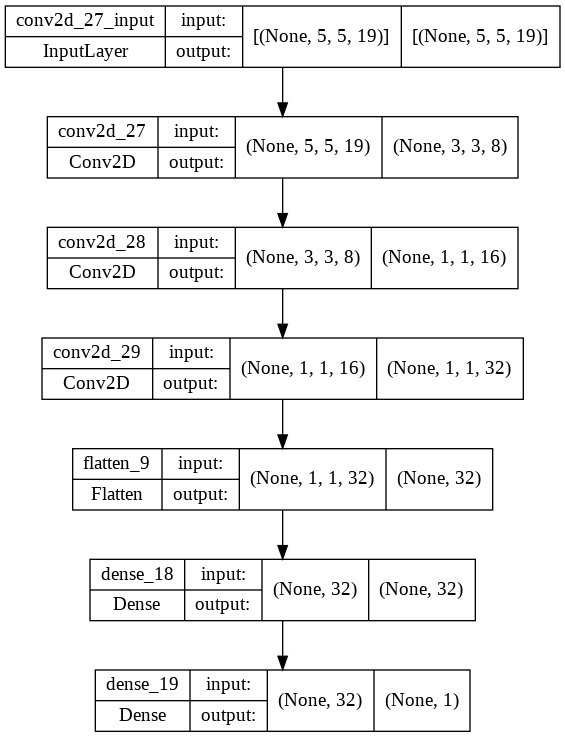

In [ ]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(5, 5, 19), padding='valid'))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid'))
model.add(layers.Conv2D(32, (1, 1), activation='relu', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##DATA TRAIN_TEST_SPLIT

In [ ]:
#Dividir data
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size = 0.2)

In [ ]:
print(f'La forma del input_train es: {inputs_train.shape}')
print(f'La forma del input_test es: {inputs_test.shape}')
print(f'La forma del outputs_train es: {outputs_train.shape}')
print(f'La forma del outputs_test es: {outputs_test.shape}')


La forma del input_train es: (209, 5, 5, 19)
La forma del input_test es: (53, 5, 5, 19)
La forma del outputs_train es: (209, 1)
La forma del outputs_test es: (53, 1)


##COMPILACIÓN DEL MODELO

In [ ]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=1)

callbacks = [checkpoint, reduce_lr]
hist = model.fit(inputs_train, outputs_train,
                 validation_data = (inputs_test, outputs_test),
                 epochs=100, callbacks=callbacks,
                 verbose=1)

Epoch 1/100
1/7 [===>..........................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.71698, saving model to best_model.h5
7/7 [==============================] - 1s 41ms/step - loss: 0.6875 - accuracy: 0.5694 - val_loss: 0.6591 - val_accuracy: 0.7170 - lr: 0.0010
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.6250
Epoch 2: val_accuracy did not improve from 0.71698
7/7 [==============================] - 0s 10ms/step - loss: 0.6686 - accuracy: 0.6316 - val_loss: 0.6638 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6446 - accuracy: 0.7812
Epoch 3: val_accuracy did not improve from 0.71698
7/7 [==============================] - 0s 11ms/step - loss: 0.6463 - accuracy: 0.6411 - val_loss: 0.6156 - val_accuracy: 0.6604 - lr: 0.0010
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.6250
Epoch 4: val_accurac

##PRECISIÓN Y PÉRDIDA DEL MODELO

##GRÁFICAS

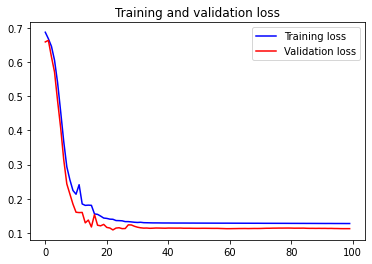

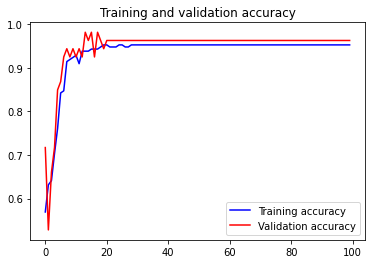

In [ ]:
plt.figure(1)
plt.plot(hist.history['loss'], color='b', label = 'Training loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure(2)
plt.plot(hist.history['accuracy'], color='b', label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##EVALUACIÓN DEL MODELO

In [ ]:
#Modelo Guardado, predicción del test
model_F = load_model('best_model.h5')
predict_test = model_F.predict(inputs_test)
print(predict_test[:5])
print('---------')
print(outputs_test[:5])

[[8.5888910e-01]
 [9.6838260e-01]
 [6.9749355e-04]
 [9.7241211e-01]
 [6.3980341e-02]]
---------
[[1.]
 [1.]
 [0.]
 [1.]
 [0.]]


In [ ]:
#Predicción del modelo de entrenamiento
predict = model.predict(inputs_test)
print(predict[:5])
print('---------')
print(outputs_test[:5])

[[8.6435008e-01]
 [9.8260939e-01]
 [1.7985702e-04]
 [9.9399030e-01]
 [2.8864592e-02]]
---------
[[1.]
 [1.]
 [0.]
 [1.]
 [0.]]


In [ ]:
#Modelo Guardado, predicción del entrenamiento
predict_train = model_F.predict(inputs_train)
print(predict_train[:5])
print('---------')
print(outputs_train[:5])

[[0.858972 ]
 [0.1432594]
 [0.8882414]
 [0.8573706]
 [0.9431577]]
---------
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [ ]:
score = model_F.evaluate(inputs_test, outputs_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 1s 6ms/step - loss: 0.1295 - accuracy: 0.9811
Test loss: 0.12949897348880768
Test accuracy: 0.9811320900917053


##MATRIZ DE CONFUSIÓN

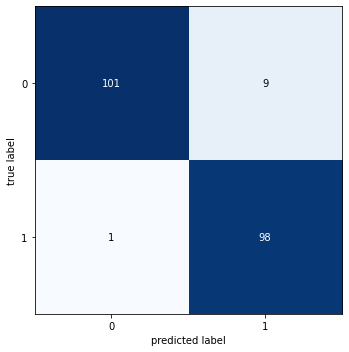

In [ ]:
#Matriz de confusión del entrenamiento
train_predict = model.predict(inputs_train)
rounded_train_predict = np.round(train_predict)
matc0=confusion_matrix(outputs_train, rounded_train_predict)
plot_confusion_matrix(conf_mat=matc0, figsize=(5,5), show_normed=False)
plt.tight_layout()

#LABELS: 
#No Deslizamientos = 0, 
#Si Deslizamientos = 1.

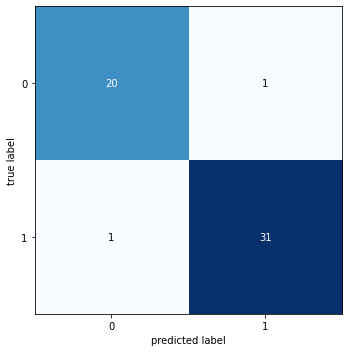

In [ ]:
#Matriz de confusión de la predicción
test_predict = model.predict(inputs_test)
rounded_test_predict = np.round(test_predict)
matc=confusion_matrix(outputs_test, rounded_test_predict)
plot_confusion_matrix(conf_mat=matc, figsize=(5,5), show_normed=False)
plt.tight_layout()

#LABELS: 
#No Deslizamientos = 0, 
#Si Deslizamientos = 1.

In [ ]:
print(metrics.classification_report(outputs_test, rounded_test_predict, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9524    0.9524    0.9524        21
         1.0     0.9688    0.9688    0.9688        32

    accuracy                         0.9623        53
   macro avg     0.9606    0.9606    0.9606        53
weighted avg     0.9623    0.9623    0.9623        53



#PREDICCIÓN

##PRUEBA N°1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
inputs_aspect= np.empty((5, 5, 5), dtype='float32')
inputs_cnbl = np.empty((5, 5, 5), dtype='float32')
inputs_cnd= np.empty((5, 5, 5), dtype='float32')
inputs_dtf= np.empty((5, 5, 5), dtype='float32')
inputs_dtr= np.empty((5, 5, 5), dtype='float32')
inputs_elv= np.empty((5, 5, 5), dtype='float32')
inputs_g1= np.empty((5, 5, 5), dtype='float32')
inputs_g3= np.empty((5, 5, 5), dtype='float32')
inputs_g4= np.empty((5, 5, 5), dtype='float32')
inputs_g5= np.empty((5, 5, 5), dtype='float32')
inputs_lsf= np.empty((5, 5, 5), dtype='float32')
inputs_plc= np.empty((5, 5, 5), dtype='float32')
inputs_prc= np.empty((5, 5, 5), dtype='float32')
inputs_rsp= np.empty((5, 5, 5), dtype='float32')
inputs_slp= np.empty((5, 5, 5), dtype='float32')
inputs_twi= np.empty((5, 5, 5), dtype='float32')
inputs_v1= np.empty((5, 5, 5), dtype='float32')
inputs_v2= np.empty((5, 5, 5), dtype='float32')
inputs_v3= np.empty((5, 5, 5), dtype='float32')

In [ ]:
aspect= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Aspect'
cnbl = r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Channel Network Base Level'
cnd= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Channel Network Distance'
dtf= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Distance to Faults'
dtr= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Distance to roads'
elv= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Elevation'
g1= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Geology'
g3= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Geology'
g4= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Geology'
g5= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Geology'
lsf= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/LS-Factor'
plc= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Plan_curvature'
prc= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Profile_curvature'
rsp= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Relative Slope Position'
slp= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Slope'
twi= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/TWI'
v1= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Vegetation'
v2= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Vegetation'
v3= r'/content/drive/MyDrive/ANALISIS_TERRENO_MARZO16/NO DESLIZAMIENTO/Vegetation'

In [ ]:
aspect_name = os.listdir(aspect)
cnbl_name = os.listdir(cnbl)
cnd_name = os.listdir(cnd)
dtf_name = os.listdir(dtf)
dtr_name = os.listdir(dtr)
elv_name = os.listdir(elv)
g1_name = os.listdir(g1)
g3_name = os.listdir(g3)
g4_name = os.listdir(g4)
g5_name = os.listdir(g5)
lsf_name = os.listdir(lsf)
plc_name = os.listdir(plc)
prc_name = os.listdir(prc)
rsp_name = os.listdir(rsp)
slp_name = os.listdir(slp)
twi_name = os.listdir(twi)
v1_name = os.listdir(v1)
v2_name = os.listdir(v2)
v3_name = os.listdir(v3)

In [ ]:
aspect_name = sorted(aspect_name)
cnbl_name = sorted(cnbl_name)
cnd_name = sorted(cnd_name)
dtf_name = sorted(dtf_name)
dtr_name = sorted(dtr_name)
elv_name = sorted(elv_name)
g1_name = sorted(g1_name)
g3_name = sorted(g3_name)
g4_name = sorted(g4_name)
g5_name = sorted(g5_name)
lsf_name = sorted(lsf_name)
plc_name = sorted(plc_name)
prc_name = sorted(prc_name)
rsp_name = sorted(rsp_name)
slp_name = sorted(slp_name)
twi_name = sorted(twi_name)
v1_name = sorted(v1_name)
v2_name = sorted(v2_name)
v3_name = sorted(v3_name)

In [ ]:
print(aspect_name)

['0.tif', '1.tif', '2.tif', '3.tif', '4.tif']


In [ ]:
l=0
for i in aspect_name:
  var_aspect=os.path.join(aspect,i)
  v_aspect = Image.open(var_aspect)
  va_aspect = np.array(v_aspect)
  inputs_aspect[l] = va_aspect
  l=l+1

l=0
for i in cnbl_name:
  var_cnbl=os.path.join(cnbl,i)
  v_cnbl = Image.open(var_cnbl)
  va_cnbl = np.array(v_cnbl)
  inputs_cnbl[l] = va_cnbl
  l=l+1

l=0
for i in cnd_name:
  var_cnd=os.path.join(cnd,i)
  v_cnd = Image.open(var_cnd)
  va_cnd = np.array(v_cnd)
  inputs_cnd[l] = va_cnd
  l=l+1

l=0
for i in dtf_name:
  var_dtf=os.path.join(dtf,i)
  v_dtf = Image.open(var_dtf)
  va_dtf = np.array(v_dtf)
  inputs_dtf[l] = va_dtf
  l=l+1

l=0
for i in dtr_name:
  var_dtr=os.path.join(dtr,i)
  v_dtr = Image.open(var_dtr)
  va_dtr = np.array(v_dtr)
  inputs_dtr[l] = va_dtr
  l=l+1

l=0
for i in elv_name:
  var_elv=os.path.join(elv,i)
  v_elv = Image.open(var_elv)
  va_elv = np.array(v_elv)
  inputs_elv[l] = va_elv
  l=l+1

l=0
for i in g1_name:
  var_g1=os.path.join(g1,i)
  v_g1 = Image.open(var_g1)
  va_g1 = np.array(v_g1)
  inputs_g1[l] = va_g1
  l=l+1

l=0
for i in g3_name:
  var_g3=os.path.join(g3,i)
  v_g3 = Image.open(var_g3)
  va_g3 = np.array(v_g3)
  inputs_g3[l] = va_g3
  l=l+1

l=0
for i in g4_name:
  var_g4=os.path.join(g4,i)
  v_g4 = Image.open(var_g4)
  va_g4 = np.array(v_g4)
  inputs_g4[l] = va_g4
  l=l+1

l=0
for i in g5_name:
  var_g5=os.path.join(g5,i)
  v_g5 = Image.open(var_g5)
  va_g5 = np.array(v_g5)
  inputs_g5[l] = va_g5
  l=l+1

l=0
for i in lsf_name:
  var_lsf=os.path.join(lsf,i)
  v_lsf = Image.open(var_lsf)
  va_lsf = np.array(v_lsf)
  inputs_lsf[l] = va_lsf
  l=l+1


l=0
for i in plc_name:
  var_plc = os.path.join(plc,i)
  v_plc = Image.open(var_plc)
  va_plc = np.array(v_plc)
  inputs_plc[l] = va_plc
  l=l+1

l=0
for i in prc_name:
  var_prc = os.path.join(prc,i)
  v_prc = Image.open(var_prc)
  va_prc = np.array(v_prc)
  inputs_prc[l] = va_prc
  l=l+1

l=0
for i in rsp_name:
  var_rsp = os.path.join(rsp,i)
  v_rsp = Image.open(var_rsp)
  va_rsp = np.array(v_rsp)
  inputs_rsp[l] = va_rsp
  l=l+1

l=0
for i in slp_name:
  var_slp = os.path.join(slp,i)
  v_slp = Image.open(var_slp)
  va_slp = np.array(v_slp)
  inputs_slp[l] = va_slp
  l=l+1

l=0
for i in twi_name:
  var_twi = os.path.join(twi,i)
  v_twi = Image.open(var_twi)
  va_twi = np.array(v_twi)
  inputs_twi[l] = va_twi
  l=l+1

l=0
for i in v1_name:
  var_v1 = os.path.join(v1,i)
  v_v1 = Image.open(var_v1)
  va_v1 = np.array(v_v1)
  inputs_v1[l] = va_v1
  l=l+1

l=0
for i in v2_name:
  var_v2 = os.path.join(v2,i)
  v_v2 = Image.open(var_v2)
  va_v2 = np.array(v_v2)
  inputs_v2[l] = va_v2
  l=l+1

l=0
for i in v3_name:
  var_v3 = os.path.join(v3,i)
  v_v3 = Image.open(var_v3)
  va_v3 = np.array(v_v3)
  inputs_v3[l] = va_v3
  l=l+1

In [ ]:
bag_predict = np.empty((5,5, 5, 19), dtype='float32')
v=len(inputs_cnbl)

In [ ]:
a=0
for a in range(v):
  bag_predict[a] = np.dstack((inputs_aspect[a], inputs_cnbl[a], inputs_cnd[a], inputs_dtf[a], inputs_dtr[a], inputs_elv[a],
                              inputs_g1[a], inputs_g3[a], inputs_g4[a], inputs_g5[a], inputs_lsf[a], inputs_plc[a], 
                              inputs_prc[a], inputs_rsp[a], inputs_slp[a], inputs_twi[a], inputs_v1[a], inputs_v2[a], inputs_v3[a]))

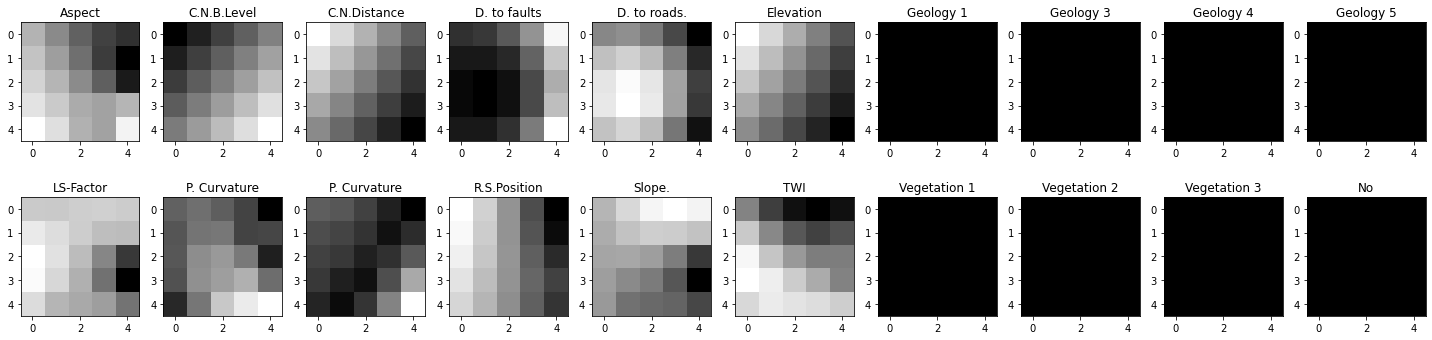

In [ ]:
fig, ax = plt.subplots(2,10,figsize=(20,5))

q=0 #Posición dentro de los inputs, Carpeta_0 No Deslizamientos
ax[0,0].imshow(bag_predict[q,:,:,0], cmap='gray')
ax[0,0].set_title('Aspect')
ax[0,1].imshow(bag_predict[q,:,:,1], cmap='gray')
ax[0,1].set_title('C.N.B.Level')
ax[0,2].imshow(bag_predict[q,:,:,2], cmap='gray')
ax[0,2].set_title('C.N.Distance')
ax[0,3].imshow(bag_predict[q,:,:,3], cmap='gray')
ax[0,3].set_title('D. to faults')
ax[0,4].imshow(bag_predict[q,:,:,4], cmap='gray')
ax[0,4].set_title('D. to roads.')
ax[0,5].imshow(bag_predict[q,:,:,5], cmap='gray')
ax[0,5].set_title('Elevation')
ax[0,6].imshow(bag_predict[q,:,:,6], cmap='gray')
ax[0,6].set_title('Geology 1')
ax[0,7].imshow(bag_predict[q,:,:,7], cmap='gray')
ax[0,7].set_title('Geology 3')
ax[0,8].imshow(bag_predict[q,:,:,8], cmap='gray')
ax[0,8].set_title('Geology 4')
ax[0,9].imshow(bag_predict[q,:,:,9], cmap='gray')
ax[0,9].set_title('Geology 5')
ax[1,0].imshow(bag_predict[q,:,:,10], cmap='gray')
ax[1,0].set_title('LS-Factor')
ax[1,1].imshow(bag_predict[q,:,:,11], cmap='gray')
ax[1,1].set_title('P. Curvature')
ax[1,2].imshow(bag_predict[q,:,:,12], cmap='gray')
ax[1,2].set_title('P. Curvature')
ax[1,3].imshow(bag_predict[q,:,:,13], cmap='gray')
ax[1,3].set_title('R.S.Position')
ax[1,4].imshow(bag_predict[q,:,:,14], cmap='gray')
ax[1,4].set_title('Slope.')
ax[1,5].imshow(bag_predict[q,:,:,15], cmap='gray')
ax[1,5].set_title('TWI')
ax[1,6].imshow(bag_predict[q,:,:,16], cmap='gray')
ax[1,6].set_title('Vegetation 1')
ax[1,7].imshow(bag_predict[q,:,:,17], cmap='gray')
ax[1,7].set_title('Vegetation 2')
ax[1,8].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,8].set_title('Vegetation 3')
ax[1,9].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,9].set_title('No')
fig.tight_layout()
plt.show()

In [ ]:
inputs_predicti = model.predict(bag_predict)
print(inputs_predicti)

[[0.00011434]
 [0.00449091]
 [0.00164425]
 [0.00012738]
 [0.00048476]]


In [ ]:
predict_1 = load_model('best_model.h5')
inputs_predict_1 = predict_1.predict(bag_predict)
print(inputs_predict_1)

[[0.00274813]
 [0.03056407]
 [0.01741153]
 [0.0033623 ]
 [0.0020085 ]]


In [ ]:
predict_1 = load_model('best_model.h5')
inputs_predict_1 = predict_1.predict(bag_predict)
print(inputs_predict_1)

[[0.00274813]
 [0.03056407]
 [0.01741153]
 [0.0033623 ]
 [0.0020085 ]]


##PRUEBA N°2

In [81]:
inputs_aspect= np.empty((131, 5, 5), dtype='float32')
inputs_cnbl = np.empty((131, 5, 5), dtype='float32')
inputs_cnd= np.empty((131, 5, 5), dtype='float32')
inputs_dtf= np.empty((131, 5, 5), dtype='float32')
inputs_dtr= np.empty((131, 5, 5), dtype='float32')
inputs_elv= np.empty((131, 5, 5), dtype='float32')
inputs_g1= np.empty((131, 5, 5), dtype='float32')
inputs_g3= np.empty((131, 5, 5), dtype='float32')
inputs_g4= np.empty((131, 5, 5), dtype='float32')
inputs_g5= np.empty((131, 5, 5), dtype='float32')
inputs_lsf= np.empty((131, 5, 5), dtype='float32')
inputs_plc= np.empty((131, 5, 5), dtype='float32')
inputs_prc= np.empty((131, 5, 5), dtype='float32')
inputs_rsp= np.empty((131, 5, 5), dtype='float32')
inputs_slp= np.empty((131, 5, 5), dtype='float32')
inputs_twi= np.empty((131, 5, 5), dtype='float32')
inputs_v1= np.empty((131, 5, 5), dtype='float32')
inputs_v2= np.empty((131, 5, 5), dtype='float32')
inputs_v3= np.empty((131, 5, 5), dtype='float32')

In [82]:
aspect= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Aspect'
cnbl = r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Channel Network Base Level'
cnd= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Channel Network Distance'
dtf= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Distance to faults'
dtr= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Distance to road'
elv= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Elevation'
g1= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/G1'
g3= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/G3'
g4= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/G4'
g5= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/G5'
lsf= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/LS-Factor'
plc= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Plan Curvature'
prc= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Profile Curvature'
rsp= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Relative Slope Position'
slp= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/Slope'
twi= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/TWI'
v1= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/V1'
v2= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/V2'
v3= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_PREDICCION/SI DESLIZAMIENTO/V3'

In [83]:
aspect_name = os.listdir(aspect)
cnbl_name = os.listdir(cnbl)
cnd_name = os.listdir(cnd)
dtf_name = os.listdir(dtf)
dtr_name = os.listdir(dtr)
elv_name = os.listdir(elv)
g1_name = os.listdir(g1)
g3_name = os.listdir(g3)
g4_name = os.listdir(g4)
g5_name = os.listdir(g5)
lsf_name = os.listdir(lsf)
plc_name = os.listdir(plc)
prc_name = os.listdir(prc)
rsp_name = os.listdir(rsp)
slp_name = os.listdir(slp)
twi_name = os.listdir(twi)
v1_name = os.listdir(v1)
v2_name = os.listdir(v2)
v3_name = os.listdir(v3)

In [84]:
aspect_name = sorted(aspect_name)
cnbl_name = sorted(cnbl_name)
cnd_name = sorted(cnd_name)
dtf_name = sorted(dtf_name)
dtr_name = sorted(dtr_name)
elv_name = sorted(elv_name)
g1_name = sorted(g1_name)
g3_name = sorted(g3_name)
g4_name = sorted(g4_name)
g5_name = sorted(g5_name)
lsf_name = sorted(lsf_name)
plc_name = sorted(plc_name)
prc_name = sorted(prc_name)
rsp_name = sorted(rsp_name)
slp_name = sorted(slp_name)
twi_name = sorted(twi_name)
v1_name = sorted(v1_name)
v2_name = sorted(v2_name)
v3_name = sorted(v3_name)

In [85]:
print(aspect_name)

['Aspect_0.tif', 'Aspect_1.tif', 'Aspect_10.tif', 'Aspect_100.tif', 'Aspect_101.tif', 'Aspect_102.tif', 'Aspect_103.tif', 'Aspect_104.tif', 'Aspect_105.tif', 'Aspect_106.tif', 'Aspect_107.tif', 'Aspect_108.tif', 'Aspect_109.tif', 'Aspect_11.tif', 'Aspect_110.tif', 'Aspect_111.tif', 'Aspect_112.tif', 'Aspect_113.tif', 'Aspect_114.tif', 'Aspect_115.tif', 'Aspect_116.tif', 'Aspect_117.tif', 'Aspect_118.tif', 'Aspect_119.tif', 'Aspect_12.tif', 'Aspect_120.tif', 'Aspect_121.tif', 'Aspect_122.tif', 'Aspect_123.tif', 'Aspect_124.tif', 'Aspect_125.tif', 'Aspect_126.tif', 'Aspect_127.tif', 'Aspect_128.tif', 'Aspect_129.tif', 'Aspect_13.tif', 'Aspect_130.tif', 'Aspect_14.tif', 'Aspect_15.tif', 'Aspect_16.tif', 'Aspect_17.tif', 'Aspect_18.tif', 'Aspect_19.tif', 'Aspect_2.tif', 'Aspect_20.tif', 'Aspect_21.tif', 'Aspect_22.tif', 'Aspect_23.tif', 'Aspect_24.tif', 'Aspect_25.tif', 'Aspect_26.tif', 'Aspect_27.tif', 'Aspect_28.tif', 'Aspect_29.tif', 'Aspect_3.tif', 'Aspect_30.tif', 'Aspect_31.tif', 'As

In [86]:
l=0
for i in aspect_name:
  var_aspect=os.path.join(aspect,i)
  v_aspect = Image.open(var_aspect)
  va_aspect = np.array(v_aspect)
  inputs_aspect[l] = va_aspect
  l=l+1

l=0
for i in cnbl_name:
  var_cnbl=os.path.join(cnbl,i)
  v_cnbl = Image.open(var_cnbl)
  va_cnbl = np.array(v_cnbl)
  inputs_cnbl[l] = va_cnbl
  l=l+1

l=0
for i in cnd_name:
  var_cnd=os.path.join(cnd,i)
  v_cnd = Image.open(var_cnd)
  va_cnd = np.array(v_cnd)
  inputs_cnd[l] = va_cnd
  l=l+1

l=0
for i in dtf_name:
  var_dtf=os.path.join(dtf,i)
  v_dtf = Image.open(var_dtf)
  va_dtf = np.array(v_dtf)
  inputs_dtf[l] = va_dtf
  l=l+1

l=0
for i in dtr_name:
  var_dtr=os.path.join(dtr,i)
  v_dtr = Image.open(var_dtr)
  va_dtr = np.array(v_dtr)
  inputs_dtr[l] = va_dtr
  l=l+1

l=0
for i in elv_name:
  var_elv=os.path.join(elv,i)
  v_elv = Image.open(var_elv)
  va_elv = np.array(v_elv)
  inputs_elv[l] = va_elv
  l=l+1

l=0
for i in g1_name:
  var_g1=os.path.join(g1,i)
  v_g1 = Image.open(var_g1)
  va_g1 = np.array(v_g1)
  inputs_g1[l] = va_g1
  l=l+1

l=0
for i in g3_name:
  var_g3=os.path.join(g3,i)
  v_g3 = Image.open(var_g3)
  va_g3 = np.array(v_g3)
  inputs_g3[l] = va_g3
  l=l+1

l=0
for i in g4_name:
  var_g4=os.path.join(g4,i)
  v_g4 = Image.open(var_g4)
  va_g4 = np.array(v_g4)
  inputs_g4[l] = va_g4
  l=l+1

l=0
for i in g5_name:
  var_g5=os.path.join(g5,i)
  v_g5 = Image.open(var_g5)
  va_g5 = np.array(v_g5)
  inputs_g5[l] = va_g5
  l=l+1

l=0
for i in lsf_name:
  var_lsf=os.path.join(lsf,i)
  v_lsf = Image.open(var_lsf)
  va_lsf = np.array(v_lsf)
  inputs_lsf[l] = va_lsf
  l=l+1


l=0
for i in plc_name:
  var_plc = os.path.join(plc,i)
  v_plc = Image.open(var_plc)
  va_plc = np.array(v_plc)
  inputs_plc[l] = va_plc
  l=l+1

l=0
for i in prc_name:
  var_prc = os.path.join(prc,i)
  v_prc = Image.open(var_prc)
  va_prc = np.array(v_prc)
  inputs_prc[l] = va_prc
  l=l+1

l=0
for i in rsp_name:
  var_rsp = os.path.join(rsp,i)
  v_rsp = Image.open(var_rsp)
  va_rsp = np.array(v_rsp)
  inputs_rsp[l] = va_rsp
  l=l+1

l=0
for i in slp_name:
  var_slp = os.path.join(slp,i)
  v_slp = Image.open(var_slp)
  va_slp = np.array(v_slp)
  inputs_slp[l] = va_slp
  l=l+1

l=0
for i in twi_name:
  var_twi = os.path.join(twi,i)
  v_twi = Image.open(var_twi)
  va_twi = np.array(v_twi)
  inputs_twi[l] = va_twi
  l=l+1

l=0
for i in v1_name:
  var_v1 = os.path.join(v1,i)
  v_v1 = Image.open(var_v1)
  va_v1 = np.array(v_v1)
  inputs_v1[l] = va_v1
  l=l+1

l=0
for i in v2_name:
  var_v2 = os.path.join(v2,i)
  v_v2 = Image.open(var_v2)
  va_v2 = np.array(v_v2)
  inputs_v2[l] = va_v2
  l=l+1

l=0
for i in v3_name:
  var_v3 = os.path.join(v3,i)
  v_v3 = Image.open(var_v3)
  va_v3 = np.array(v_v3)
  inputs_v3[l] = va_v3
  l=l+1

In [87]:
bag_predict = np.empty((231,5, 5, 19), dtype='float32')
v=len(inputs_cnbl)

In [88]:
print(v)

131


In [89]:
a=0
for a in range(v):
  bag_predict[a] = np.dstack((inputs_aspect[a], inputs_cnbl[a], inputs_cnd[a], inputs_dtf[a], inputs_dtr[a], inputs_elv[a],
                              inputs_g1[a], inputs_g3[a], inputs_g4[a], inputs_g5[a], inputs_lsf[a], inputs_plc[a], 
                              inputs_prc[a], inputs_rsp[a], inputs_slp[a], inputs_twi[a], inputs_v1[a], inputs_v2[a], inputs_v3[a]))

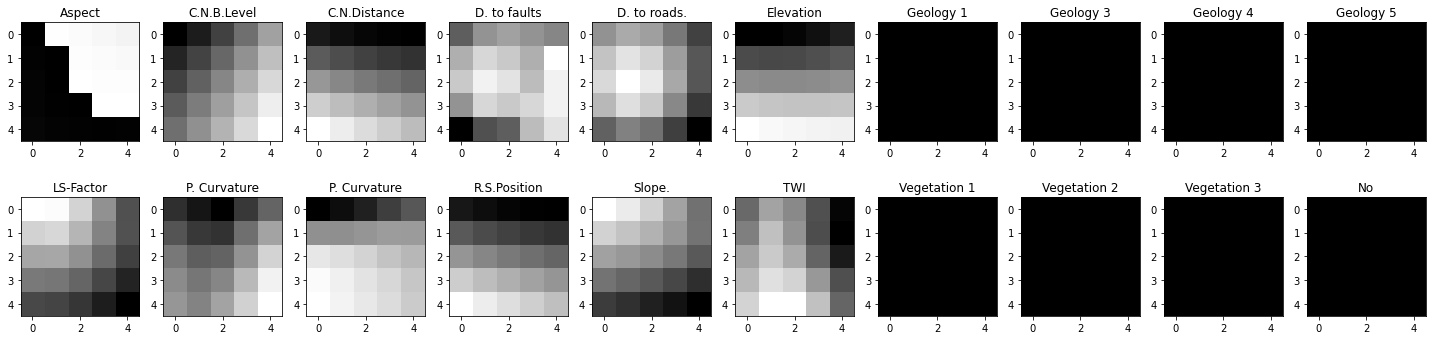

In [90]:
fig, ax = plt.subplots(2,10,figsize=(20,5))

q=0 #Posición dentro de los inputs, Carpeta_0 No Deslizamientos
ax[0,0].imshow(bag_predict[q,:,:,0], cmap='gray')
ax[0,0].set_title('Aspect')
ax[0,1].imshow(bag_predict[q,:,:,1], cmap='gray')
ax[0,1].set_title('C.N.B.Level')
ax[0,2].imshow(bag_predict[q,:,:,2], cmap='gray')
ax[0,2].set_title('C.N.Distance')
ax[0,3].imshow(bag_predict[q,:,:,3], cmap='gray')
ax[0,3].set_title('D. to faults')
ax[0,4].imshow(bag_predict[q,:,:,4], cmap='gray')
ax[0,4].set_title('D. to roads.')
ax[0,5].imshow(bag_predict[q,:,:,5], cmap='gray')
ax[0,5].set_title('Elevation')
ax[0,6].imshow(bag_predict[q,:,:,6], cmap='gray')
ax[0,6].set_title('Geology 1')
ax[0,7].imshow(bag_predict[q,:,:,7], cmap='gray')
ax[0,7].set_title('Geology 3')
ax[0,8].imshow(bag_predict[q,:,:,8], cmap='gray')
ax[0,8].set_title('Geology 4')
ax[0,9].imshow(bag_predict[q,:,:,9], cmap='gray')
ax[0,9].set_title('Geology 5')
ax[1,0].imshow(bag_predict[q,:,:,10], cmap='gray')
ax[1,0].set_title('LS-Factor')
ax[1,1].imshow(bag_predict[q,:,:,11], cmap='gray')
ax[1,1].set_title('P. Curvature')
ax[1,2].imshow(bag_predict[q,:,:,12], cmap='gray')
ax[1,2].set_title('P. Curvature')
ax[1,3].imshow(bag_predict[q,:,:,13], cmap='gray')
ax[1,3].set_title('R.S.Position')
ax[1,4].imshow(bag_predict[q,:,:,14], cmap='gray')
ax[1,4].set_title('Slope.')
ax[1,5].imshow(bag_predict[q,:,:,15], cmap='gray')
ax[1,5].set_title('TWI')
ax[1,6].imshow(bag_predict[q,:,:,16], cmap='gray')
ax[1,6].set_title('Vegetation 1')
ax[1,7].imshow(bag_predict[q,:,:,17], cmap='gray')
ax[1,7].set_title('Vegetation 2')
ax[1,8].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,8].set_title('Vegetation 3')
ax[1,9].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,9].set_title('No')
fig.tight_layout()
plt.show()

In [91]:
predict_1 = load_model('best_model.h5')
inputs_predict_1 = predict_1.predict(bag_predict)
print(inputs_predict_1)

[[0.54059213]
 [0.77614367]
 [0.967306  ]
 [0.9620379 ]
 [0.7789695 ]
 [0.94342375]
 [0.9281115 ]
 [0.82027686]
 [0.92041755]
 [0.90210235]
 [0.9164499 ]
 [0.93020415]
 [0.92996264]
 [0.85441685]
 [0.9219214 ]
 [0.90725195]
 [0.9192237 ]
 [0.9178728 ]
 [0.92927337]
 [0.92350423]
 [0.9029025 ]
 [0.91445506]
 [0.90432906]
 [0.93661845]
 [0.9379134 ]
 [0.91604984]
 [0.9142126 ]
 [0.9182572 ]
 [0.9248701 ]
 [0.9210756 ]
 [0.91908026]
 [0.9311526 ]
 [0.53557265]
 [0.70330703]
 [0.931586  ]
 [0.93698   ]
 [0.93261397]
 [0.7942604 ]
 [0.79440427]
 [0.23751825]
 [0.0807628 ]
 [0.9694215 ]
 [0.987579  ]
 [0.6433892 ]
 [0.98532116]
 [0.98748684]
 [0.99536026]
 [0.99528754]
 [0.99487126]
 [0.44262907]
 [0.04392341]
 [0.39167476]
 [0.6856122 ]
 [0.8228005 ]
 [0.6740002 ]
 [0.894511  ]
 [0.77207243]
 [0.95219505]
 [0.9930289 ]
 [0.99436617]
 [0.28341076]
 [0.98395157]
 [0.99433875]
 [0.9500983 ]
 [0.98321164]
 [0.984851  ]
 [0.9902548 ]
 [0.9886651 ]
 [0.9814563 ]
 [0.9896806 ]
 [0.99018085]
 [0.99

##PRUEBA N°3

In [92]:
inputs_aspect= np.empty((30, 5, 5), dtype='float32')
inputs_cnbl = np.empty((30, 5, 5), dtype='float32')
inputs_cnd= np.empty((30, 5, 5), dtype='float32')
inputs_dtf= np.empty((30, 5, 5), dtype='float32')
inputs_dtr= np.empty((30, 5, 5), dtype='float32')
inputs_elv= np.empty((30, 5, 5), dtype='float32')
inputs_g1= np.empty((30, 5, 5), dtype='float32')
inputs_g3= np.empty((30, 5, 5), dtype='float32')
inputs_g4= np.empty((30, 5, 5), dtype='float32')
inputs_g5= np.empty((30, 5, 5), dtype='float32')
inputs_lsf= np.empty((30, 5, 5), dtype='float32')
inputs_plc= np.empty((30, 5, 5), dtype='float32')
inputs_prc= np.empty((30, 5, 5), dtype='float32')
inputs_rsp= np.empty((30, 5, 5), dtype='float32')
inputs_slp= np.empty((30, 5, 5), dtype='float32')
inputs_twi= np.empty((30, 5, 5), dtype='float32')
inputs_v1= np.empty((30, 5, 5), dtype='float32')
inputs_v2= np.empty((30, 5, 5), dtype='float32')
inputs_v3= np.empty((30, 5, 5), dtype='float32')

In [93]:
aspect= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Aspect'
cnbl = r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Channel_Network_Base_Level'
cnd= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Channel_Network_Distance'
dtf= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Distance_to_faults'
dtr= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Distance_to_roads'
elv= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Elevation'
g1= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/G1'
g3= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/G3'
g4= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/G4'
g5= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/G5'
lsf= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/LS-Factor'
plc= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Plan_curvature'
prc= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Profile_curvature'
rsp= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Relative_Slope_Position'
slp= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/Slope'
twi= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/TWI'
v1= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/V1'
v2= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/V2'
v3= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PRUEBA_BUFFER2/V3'

In [94]:
aspect_name = os.listdir(aspect)
cnbl_name = os.listdir(cnbl)
cnd_name = os.listdir(cnd)
dtf_name = os.listdir(dtf)
dtr_name = os.listdir(dtr)
elv_name = os.listdir(elv)
g1_name = os.listdir(g1)
g3_name = os.listdir(g3)
g4_name = os.listdir(g4)
g5_name = os.listdir(g5)
lsf_name = os.listdir(lsf)
plc_name = os.listdir(plc)
prc_name = os.listdir(prc)
rsp_name = os.listdir(rsp)
slp_name = os.listdir(slp)
twi_name = os.listdir(twi)
v1_name = os.listdir(v1)
v2_name = os.listdir(v2)
v3_name = os.listdir(v3)

In [95]:
aspect_name = sorted(aspect_name)
cnbl_name = sorted(cnbl_name)
cnd_name = sorted(cnd_name)
dtf_name = sorted(dtf_name)
dtr_name = sorted(dtr_name)
elv_name = sorted(elv_name)
g1_name = sorted(g1_name)
g3_name = sorted(g3_name)
g4_name = sorted(g4_name)
g5_name = sorted(g5_name)
lsf_name = sorted(lsf_name)
plc_name = sorted(plc_name)
prc_name = sorted(prc_name)
rsp_name = sorted(rsp_name)
slp_name = sorted(slp_name)
twi_name = sorted(twi_name)
v1_name = sorted(v1_name)
v2_name = sorted(v2_name)
v3_name = sorted(v3_name)

In [96]:
print(aspect_name)

['Aspect_0.tif', 'Aspect_1.tif', 'Aspect_10.tif', 'Aspect_11.tif', 'Aspect_12.tif', 'Aspect_13.tif', 'Aspect_14.tif', 'Aspect_15.tif', 'Aspect_16.tif', 'Aspect_17.tif', 'Aspect_18.tif', 'Aspect_19.tif', 'Aspect_2.tif', 'Aspect_20.tif', 'Aspect_21.tif', 'Aspect_22.tif', 'Aspect_23.tif', 'Aspect_24.tif', 'Aspect_25.tif', 'Aspect_26.tif', 'Aspect_27.tif', 'Aspect_28.tif', 'Aspect_29.tif', 'Aspect_3.tif', 'Aspect_4.tif', 'Aspect_5.tif', 'Aspect_6.tif', 'Aspect_7.tif', 'Aspect_8.tif', 'Aspect_9.tif']


In [97]:
l=0
for i in aspect_name:
  var_aspect=os.path.join(aspect,i)
  v_aspect = Image.open(var_aspect)
  va_aspect = np.array(v_aspect)
  inputs_aspect[l] = va_aspect
  l=l+1

l=0
for i in cnbl_name:
  var_cnbl=os.path.join(cnbl,i)
  v_cnbl = Image.open(var_cnbl)
  va_cnbl = np.array(v_cnbl)
  inputs_cnbl[l] = va_cnbl
  l=l+1

l=0
for i in cnd_name:
  var_cnd=os.path.join(cnd,i)
  v_cnd = Image.open(var_cnd)
  va_cnd = np.array(v_cnd)
  inputs_cnd[l] = va_cnd
  l=l+1

l=0
for i in dtf_name:
  var_dtf=os.path.join(dtf,i)
  v_dtf = Image.open(var_dtf)
  va_dtf = np.array(v_dtf)
  inputs_dtf[l] = va_dtf
  l=l+1

l=0
for i in dtr_name:
  var_dtr=os.path.join(dtr,i)
  v_dtr = Image.open(var_dtr)
  va_dtr = np.array(v_dtr)
  inputs_dtr[l] = va_dtr
  l=l+1

l=0
for i in elv_name:
  var_elv=os.path.join(elv,i)
  v_elv = Image.open(var_elv)
  va_elv = np.array(v_elv)
  inputs_elv[l] = va_elv
  l=l+1

l=0
for i in g1_name:
  var_g1=os.path.join(g1,i)
  v_g1 = Image.open(var_g1)
  va_g1 = np.array(v_g1)
  inputs_g1[l] = va_g1
  l=l+1

l=0
for i in g3_name:
  var_g3=os.path.join(g3,i)
  v_g3 = Image.open(var_g3)
  va_g3 = np.array(v_g3)
  inputs_g3[l] = va_g3
  l=l+1

l=0
for i in g4_name:
  var_g4=os.path.join(g4,i)
  v_g4 = Image.open(var_g4)
  va_g4 = np.array(v_g4)
  inputs_g4[l] = va_g4
  l=l+1

l=0
for i in g5_name:
  var_g5=os.path.join(g5,i)
  v_g5 = Image.open(var_g5)
  va_g5 = np.array(v_g5)
  inputs_g5[l] = va_g5
  l=l+1

l=0
for i in lsf_name:
  var_lsf=os.path.join(lsf,i)
  v_lsf = Image.open(var_lsf)
  va_lsf = np.array(v_lsf)
  inputs_lsf[l] = va_lsf
  l=l+1


l=0
for i in plc_name:
  var_plc = os.path.join(plc,i)
  v_plc = Image.open(var_plc)
  va_plc = np.array(v_plc)
  inputs_plc[l] = va_plc
  l=l+1

l=0
for i in prc_name:
  var_prc = os.path.join(prc,i)
  v_prc = Image.open(var_prc)
  va_prc = np.array(v_prc)
  inputs_prc[l] = va_prc
  l=l+1

l=0
for i in rsp_name:
  var_rsp = os.path.join(rsp,i)
  v_rsp = Image.open(var_rsp)
  va_rsp = np.array(v_rsp)
  inputs_rsp[l] = va_rsp
  l=l+1

l=0
for i in slp_name:
  var_slp = os.path.join(slp,i)
  v_slp = Image.open(var_slp)
  va_slp = np.array(v_slp)
  inputs_slp[l] = va_slp
  l=l+1

l=0
for i in twi_name:
  var_twi = os.path.join(twi,i)
  v_twi = Image.open(var_twi)
  va_twi = np.array(v_twi)
  inputs_twi[l] = va_twi
  l=l+1

l=0
for i in v1_name:
  var_v1 = os.path.join(v1,i)
  v_v1 = Image.open(var_v1)
  va_v1 = np.array(v_v1)
  inputs_v1[l] = va_v1
  l=l+1

l=0
for i in v2_name:
  var_v2 = os.path.join(v2,i)
  v_v2 = Image.open(var_v2)
  va_v2 = np.array(v_v2)
  inputs_v2[l] = va_v2
  l=l+1

l=0
for i in v3_name:
  var_v3 = os.path.join(v3,i)
  v_v3 = Image.open(var_v3)
  va_v3 = np.array(v_v3)
  inputs_v3[l] = va_v3
  l=l+1

In [98]:
bag_predict3 = np.empty((30,5, 5, 19), dtype='float32')
v=len(inputs_cnbl)

In [99]:
a=0
for a in range(v):
  bag_predict3[a] = np.dstack((inputs_aspect[a], inputs_cnbl[a], inputs_cnd[a], inputs_dtf[a], inputs_dtr[a], inputs_elv[a],
                              inputs_g1[a], inputs_g3[a], inputs_g4[a], inputs_g5[a], inputs_lsf[a], inputs_plc[a], 
                              inputs_prc[a], inputs_rsp[a], inputs_slp[a], inputs_twi[a], inputs_v1[a], inputs_v2[a], inputs_v3[a]))

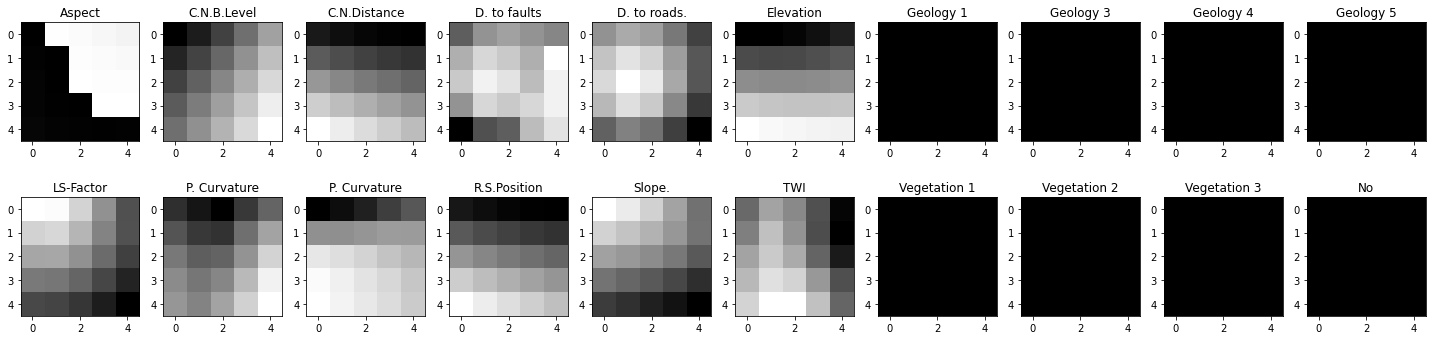

In [100]:
fig, ax = plt.subplots(2,10,figsize=(20,5))

q=0 #Posición dentro de los inputs, Carpeta_0 No Deslizamientos
ax[0,0].imshow(bag_predict[q,:,:,0], cmap='gray')
ax[0,0].set_title('Aspect')
ax[0,1].imshow(bag_predict[q,:,:,1], cmap='gray')
ax[0,1].set_title('C.N.B.Level')
ax[0,2].imshow(bag_predict[q,:,:,2], cmap='gray')
ax[0,2].set_title('C.N.Distance')
ax[0,3].imshow(bag_predict[q,:,:,3], cmap='gray')
ax[0,3].set_title('D. to faults')
ax[0,4].imshow(bag_predict[q,:,:,4], cmap='gray')
ax[0,4].set_title('D. to roads.')
ax[0,5].imshow(bag_predict[q,:,:,5], cmap='gray')
ax[0,5].set_title('Elevation')
ax[0,6].imshow(bag_predict[q,:,:,6], cmap='gray')
ax[0,6].set_title('Geology 1')
ax[0,7].imshow(bag_predict[q,:,:,7], cmap='gray')
ax[0,7].set_title('Geology 3')
ax[0,8].imshow(bag_predict[q,:,:,8], cmap='gray')
ax[0,8].set_title('Geology 4')
ax[0,9].imshow(bag_predict[q,:,:,9], cmap='gray')
ax[0,9].set_title('Geology 5')
ax[1,0].imshow(bag_predict[q,:,:,10], cmap='gray')
ax[1,0].set_title('LS-Factor')
ax[1,1].imshow(bag_predict[q,:,:,11], cmap='gray')
ax[1,1].set_title('P. Curvature')
ax[1,2].imshow(bag_predict[q,:,:,12], cmap='gray')
ax[1,2].set_title('P. Curvature')
ax[1,3].imshow(bag_predict[q,:,:,13], cmap='gray')
ax[1,3].set_title('R.S.Position')
ax[1,4].imshow(bag_predict[q,:,:,14], cmap='gray')
ax[1,4].set_title('Slope.')
ax[1,5].imshow(bag_predict[q,:,:,15], cmap='gray')
ax[1,5].set_title('TWI')
ax[1,6].imshow(bag_predict[q,:,:,16], cmap='gray')
ax[1,6].set_title('Vegetation 1')
ax[1,7].imshow(bag_predict[q,:,:,17], cmap='gray')
ax[1,7].set_title('Vegetation 2')
ax[1,8].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,8].set_title('Vegetation 3')
ax[1,9].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,9].set_title('No')
fig.tight_layout()
plt.show()

In [102]:
predict_1 = load_model('best_model.h5')
inputs_predict_1 = predict_1.predict(bag_predict3)
print(inputs_predict_1)

[[0.9245379 ]
 [0.9160327 ]
 [0.92141783]
 [0.9127705 ]
 [0.91621673]
 [0.91516113]
 [0.8934667 ]
 [0.9202267 ]
 [0.9117234 ]
 [0.9123271 ]
 [0.9115739 ]
 [0.88653123]
 [0.92257077]
 [0.919379  ]
 [0.9114228 ]
 [0.9082694 ]
 [0.9091657 ]
 [0.88152957]
 [0.91877824]
 [0.91107714]
 [0.9064319 ]
 [0.90868187]
 [0.88146055]
 [0.92218995]
 [0.9019921 ]
 [0.9229336 ]
 [0.91438913]
 [0.91998357]
 [0.91913354]
 [0.8985115 ]]


In [104]:
predict_1 = load_model('best_model (1).h5')
inputs_predict_1 = predict_1.predict(bag_predict3)
print(inputs_predict_1)

[[0.9470422 ]
 [0.93551815]
 [0.94428027]
 [0.931549  ]
 [0.93619037]
 [0.92951673]
 [0.92577165]
 [0.94325495]
 [0.9295351 ]
 [0.93326396]
 [0.9255057 ]
 [0.92231274]
 [0.93970513]
 [0.94220275]
 [0.92744815]
 [0.9305603 ]
 [0.9222924 ]
 [0.9201349 ]
 [0.9409666 ]
 [0.925729  ]
 [0.92972666]
 [0.92203796]
 [0.9208658 ]
 [0.93319905]
 [0.92950195]
 [0.94556713]
 [0.933481  ]
 [0.938227  ]
 [0.9319824 ]
 [0.92837083]]
